In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [25]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [27]:
pwd

'/Users/vivianpeng/git/molecular_classification/code'

In [28]:
train_dir = "../train_data"
validation_dir = "../test_data"

In [31]:
num_anp_tr = len(os.listdir("../train_data/antineoplastic"))
num_cns_tr = len(os.listdir("../train_data/cns"))
num_cardio_tr = len(os.listdir("../train_data/cardio"))


num_anp_val = len(os.listdir("../test_data/antineoplastic"))
num_cns_val = len(os.listdir("../test_data/cns"))
num_cardio_val = len(os.listdir("../test_data/cardio"))

total_train = num_anp_tr + num_cns_tr
total_val = num_anp_val + num_cns_val

In [32]:
print('total training antineoplastic images:', num_anp_tr)
print('total training cns images:', num_cns_tr)
print('total training cardio images:', num_cardio_tr)

print('total validation antineoplastic images:', num_anp_val)
print('total validation cns images:', num_cns_val)
print('total validation cardio images:', num_cardio_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training antineoplastic images: 751
total training cns images: 751
total training cardio images: 657
total validation antineoplastic images: 350
total validation cns images: 350
total validation cardio images: 131
--
Total training images: 1502
Total validation images: 700


## Set up batch variables

In [33]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [35]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2159 images belonging to 3 classes.


In [36]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 831 images belonging to 3 classes.


## Visualize train data

In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

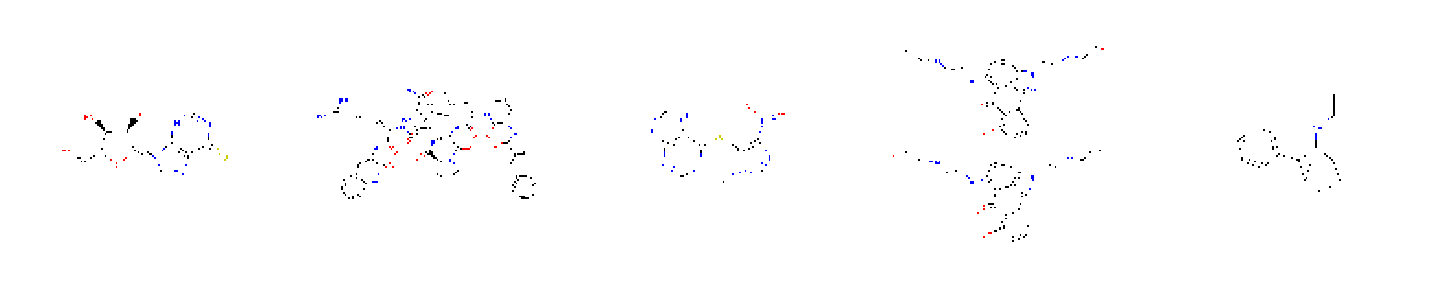

In [14]:
plotImages(sample_training_images[:5])

## Create Model

In [15]:
model = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

## Compile Model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Train Model

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 5 steps
Epoch 1/15
11/11 [==============================] - 19s 2s/step - loss: 1.1649 - accuracy: 0.5022 - val_loss: 0.6952 - val_accuracy: 0.4938
Epoch 2/15
11/11 [==============================] - 17s 2s/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.6790 - val_accuracy: 0.4938
Epoch 3/15
11/11 [==============================] - 17s 2s/step - loss: 0.6636 - accuracy: 0.5422 - val_loss: 0.6387 - val_accuracy: 0.5094
Epoch 4/15
11/11 [==============================] - 17s 2s/step - loss: 0.6349 - accuracy: 0.5902 - val_loss: 0.6206 - val_accuracy: 0.6219
Epoch 5/15
11/11 [==============================] - 17s 2s/step - loss: 0.6063 - accuracy: 0.6485 - val_loss: 0.6266 - val_accuracy: 0.5938
Epoch 6/15
11/11 [==============================] - 18s 2s/step - loss: 0.5889 - accuracy: 0.6572 - val_loss: 0.6225 - val_accuracy: 

## Plot accuracy

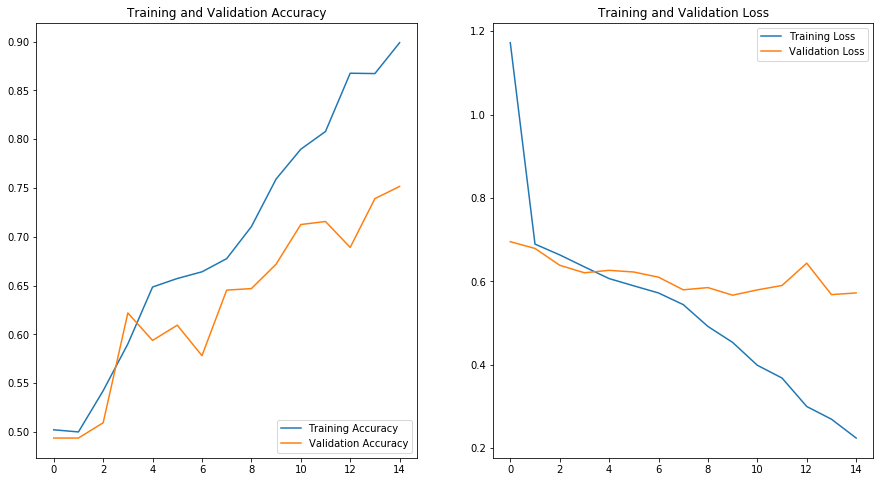

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model for multi-class

In [37]:
model2 = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation = "softmax")
])

In [41]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [42]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [43]:
history2 = model2.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 5 steps
Epoch 1/15
11/11 [==============================] - 19s 2s/step - loss: 11.3607 - accuracy: 0.1818 - val_loss: 18.5731 - val_accuracy: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 20s 2s/step - loss: 80.8590 - accuracy: 0.1840 - val_loss: 242.7390 - val_accuracy: 0.0000e+00
Epoch 3/15
11/11 [==============================] - 19s 2s/step - loss: 346.3208 - accuracy: 0.1840 - val_loss: 716.4966 - val_accuracy: 0.0000e+00
Epoch 4/15
11/11 [==============================] - 18s 2s/step - loss: 1298.9181 - accuracy: 0.3636 - val_loss: 1903.6937 - val_accuracy: 1.0000
Epoch 5/15
11/11 [==============================] - 18s 2s/step - loss: 7420.4333 - accuracy: 0.3559 - val_loss: 12918.9797 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 18s 2s/step - loss: 26945.0089 - accuracy: 0.3636 - val_loss: 35057.4500 - val_accuracy: 0.0000e+00
Epoch 7/15
11/11 [=====

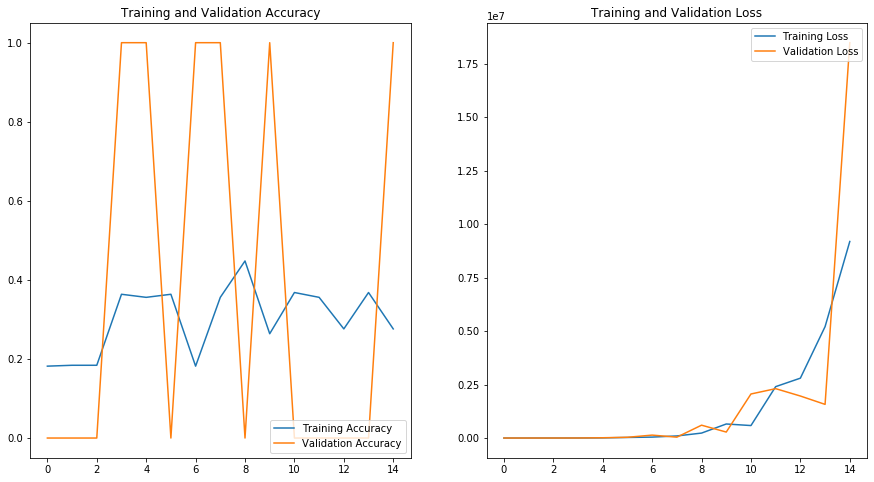

In [44]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()